In [6]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv("Iris.csv")
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white',color_codes=True)


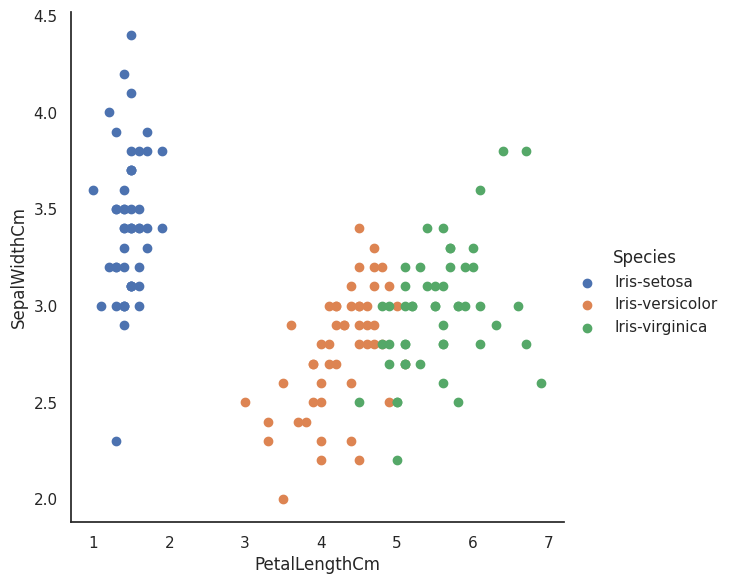

In [12]:
sns.FacetGrid(data, hue="Species", height=6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()



In [13]:
floor_mapping = {'Iris-virginica' : 0,'Iris-versicolor' : 1,'Iris-setosa' : 3}
data['Species'] = data['Species'].map(floor_mapping)



In [14]:
data.head(5)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,3
1,2,4.9,3.0,1.4,0.2,3
2,3,4.7,3.2,1.3,0.2,3
3,4,4.6,3.1,1.5,0.2,3
4,5,5.0,3.6,1.4,0.2,3


In [15]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = data[["Species"]].values


In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x,y.ravel())

LogisticRegression()

In [17]:
expected = y
predicted = model.predict(x)


In [18]:
model.score(x,y)


0.9733333333333334

In [19]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96        50
           1       0.98      0.94      0.96        50
           3       1.00      1.00      1.00        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [20]:
print(metrics.confusion_matrix(expected, predicted))

[[49  1  0]
 [ 3 47  0]
 [ 0  0 50]]


In [21]:
model = LogisticRegression(C=100,penalty='l2')
y.flatten()

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
model.fit(x,y.flatten())

LogisticRegression(C=100)

In [23]:
model.score(x,y)

0.98